In [1]:
import os
import glob
import pandas as pd
import panel as pn
pn.extension('tabulator')
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import hvplot.pandas
import hvplot.pandas
from bokeh.sampledata.penguins import data as df




#### In our dataset we have large number of files, first we going to merge all files together into a single DataFrame
#### First we giving path where the dataset stored,
#### then we using glob = Python glob. glob() method returns a list of files or folders that matches the path 
#### Specified in the pathname argument.
#### Next ,Read the CSV file and stored it as a temporary dataframe
#### Use Rindex to get last occurence of the '/' and ignore the file folder information
#### Also split the data into city & Type like weekend, weekday 
#### Create city and type columns in the dataframe and store the values for future processing
#### Append the temporary dataframe into an array of dataframes
#### Append all the dataframes into single dataframe using concat function

In [2]:
#define path to CSV files
path = r'dataset'


#identify all CSV files
all_files = glob.glob(os.path.join(path,"*.csv"))

allFiles_df=[]

for files in all_files:
     
    temp = pd.read_csv(files , index_col=[0]);
    fileName = files[files.rindex('\\')+1:files.index('.')].split('_')
    
    temp['city']=fileName[0];
    temp['type']=fileName[1];
    
    allFiles_df.append(temp);
 

airbnb_df=pd.concat(allFiles_df, ignore_index=True)

                                   
    


#### Using head and tail functions to see first and last 5 rows

In [3]:
airbnb_df.head()
               

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,type
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,weekdays
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,weekdays
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,weekdays
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,weekdays
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,weekdays


In [4]:
airbnb_df.tail()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,type
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,...,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,vienna,weekends
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,...,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,vienna,weekends
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,...,0.994051,0.202539,169.073402,12.107921,282.296425,6.822996,16.38568,48.20460,vienna,weekends
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,...,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,vienna,weekends
51706,133.230489,Private room,False,True,4.0,True,1,0,10.0,93.0,...,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140,16.39066,48.20811,vienna,weekends


## Cleaning dataset

#### checking is there any missing data or null values in our dataset,where in this data set we dont have any null rows 
####  getting to know more about dataset, by knowing the total size of rows and columns ,maxium,min, price range for airbnb  stay,seeing difference between weekend and weekday stay,room availability,

In [5]:
airbnb_df.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
type                          0
dtype: int64

In [6]:
airbnb_df.shape

(51707, 21)

In [38]:
weekdays_df.shape

(25500, 9)

#### so below describe function show us the overall view of dataset The describe() method returns description of the data in the DataFrame.
#### If the DataFrame contains numerical data, the description contains these information for each column:

In [ ]:
airbnb_df.describe()

#### DROP column we no longer using

In [8]:
weekends_df = airbnb_df[(airbnb_df['type']=='weekends')]
weekends_df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,type
1103,319.640053,Private room,False,True,2.0,False,0,1,9.0,88.0,...,4.763360,0.852117,110.906123,5.871971,136.982208,11.941560,4.84639,52.34137,amsterdam,weekends
1104,347.995219,Private room,False,True,2.0,False,0,1,9.0,87.0,...,5.748310,3.651591,75.275937,3.985516,95.386468,8.315410,4.97512,52.36103,amsterdam,weekends
1105,482.975183,Private room,False,True,4.0,False,0,1,9.0,90.0,...,0.384872,0.439852,493.272517,26.116521,875.114817,76.289005,4.89417,52.37663,amsterdam,weekends
1106,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,...,0.544723,0.318688,552.849514,29.270850,815.303994,71.074937,4.90051,52.37508,amsterdam,weekends
1107,2771.541724,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,...,1.686798,1.458399,208.809162,11.055489,272.315202,23.739349,4.88467,52.38749,amsterdam,weekends


In [9]:
#drop_column= airbnb_df.drop(['room_shared','host_is_superhost','room_shared','room_private',"multi",'biz','attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat','type'], axis=1, inplace=False)
#drop_column

In [10]:
drop_column= airbnb_df.drop(['room_shared','host_is_superhost','room_shared','room_private',"multi",'biz','attr_index','attr_index_norm','rest_index','rest_index_norm','lng','lat','type'], axis=1, inplace=False)
drop_column

,realSum,room_type,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city
0,194.033698,Private room,2.0,10.0,93.0,1,5.022964,2.539380,amsterdam
1,344.245776,Private room,4.0,8.0,85.0,1,0.488389,0.239404,amsterdam
2,264.101422,Private room,2.0,9.0,87.0,1,5.748312,3.651621,amsterdam
3,433.529398,Private room,4.0,9.0,90.0,2,0.384862,0.439876,amsterdam
4,485.552926,Private room,2.0,10.0,98.0,1,0.544738,0.318693,amsterdam
...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,6.0,10.0,100.0,3,0.530181,0.135447,vienna
51703,304.793960,Entire home/apt,2.0,8.0,86.0,1,0.810205,0.100839,vienna
51704,637.168969,Entire home/apt,2.0,10.0,93.0,1,0.994051,0.202539,vienna
51705,301.054157,Private room,2.0,10.0,87.0,1,3.044100,0.287435,vienna


In [11]:
weekdays_df = drop_column.loc[(airbnb_df['type']== "weekdays")]
weekdays_df

,realSum,room_type,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city
0,194.033698,Private room,2.0,10.0,93.0,1,5.022964,2.539380,amsterdam
1,344.245776,Private room,4.0,8.0,85.0,1,0.488389,0.239404,amsterdam
2,264.101422,Private room,2.0,9.0,87.0,1,5.748312,3.651621,amsterdam
3,433.529398,Private room,4.0,9.0,90.0,2,0.384862,0.439876,amsterdam
4,485.552926,Private room,2.0,10.0,98.0,1,0.544738,0.318693,amsterdam
...,...,...,...,...,...,...,...,...,...
49903,219.012224,Entire home/apt,4.0,8.0,80.0,0,0.298179,0.257904,vienna
49904,191.197438,Entire home/apt,4.0,10.0,100.0,2,1.052982,0.332054,vienna
49905,251.501765,Entire home/apt,2.0,8.0,86.0,1,0.810224,0.100844,vienna
49906,637.636444,Entire home/apt,2.0,10.0,93.0,1,0.994039,0.202537,vienna


In [12]:
weekends_df = drop_column[(airbnb_df['type']=='weekends')]
weekends_df.head()

,realSum,room_type,person_capacity,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city
1103,319.640053,Private room,2.0,9.0,88.0,1,4.763360,0.852117,amsterdam
1104,347.995219,Private room,2.0,9.0,87.0,1,5.748310,3.651591,amsterdam
1105,482.975183,Private room,4.0,9.0,90.0,2,0.384872,0.439852,amsterdam
1106,485.552926,Private room,2.0,10.0,98.0,1,0.544723,0.318688,amsterdam
1107,2771.541724,Entire home/apt,4.0,10.0,100.0,3,1.686798,1.458399,amsterdam


### we have 10 unique city display in airbnb and mostly the differnce between  rooms listings in weekends and weekday are almost same.where in entire home/apt type listings in weekends are litlle higher 

In [13]:
city_list =airbnb_df.city.unique()
print(city_list)


['amsterdam' 'athens' 'barcelona' 'berlin' 'budapest' 'lisbon' 'london'
 'paris' 'rome' 'vienna']


In [14]:
df = airbnb_df.groupby(['type','room_type']).size()
df

type      room_type      
weekdays  Entire home/apt    15994
          Private room        9326
          Shared room          180
weekends  Entire home/apt    16654
          Private room        9367
          Shared room          186
dtype: int64

In [15]:
#weekends_df.city.value_counts()

### Here it show max amd min rate for rooms, where as london and rome has more airbnb listings ,amsterdam has less airbnb service

In [16]:
weekdays_df.realSum.max()

18545.450284723363

In [17]:
weekends_df.realSum.max()

13656.35883

In [18]:
weekends_df.realSum.min()

34.77933919255534

In [19]:
weekdays_df.realSum.min()

37.12929454340368

In [20]:

availability = airbnb_df.groupby(['city','type']).size()
availability

city       type    
amsterdam  weekdays    1103
           weekends     977
athens     weekdays    2653
           weekends    2627
barcelona  weekdays    1555
           weekends    1278
berlin     weekdays    1284
           weekends    1200
budapest   weekdays    2074
           weekends    1948
lisbon     weekdays    2857
           weekends    2906
london     weekdays    4614
           weekends    5379
paris      weekdays    3130
           weekends    3558
rome       weekdays    4492
           weekends    4535
vienna     weekdays    1738
           weekends    1799
dtype: int64

### shows the relationship between a numeric and a categoric variable.

Text(0.5, 1.0, 'Europe room listings')

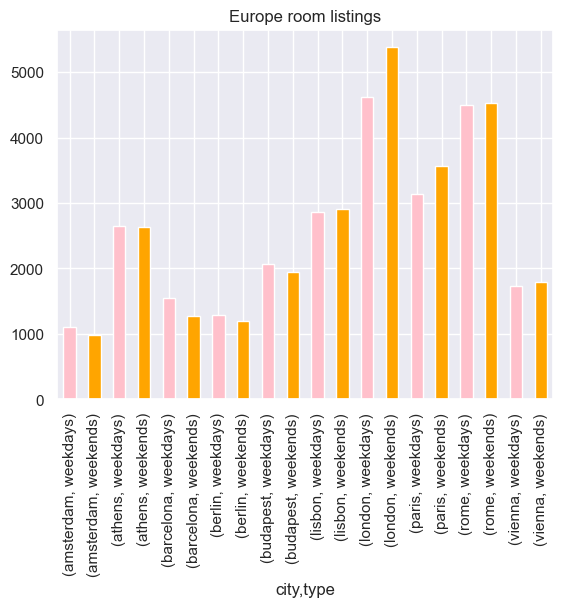

In [72]:
#availability.plot.bar( x = 'city',hue = "type")

#sns.barplot(x=city,y = 'type',hue='type',df = availability,)

#availability.plot(kind="bar")
#plt.title("Available airbnb listings")
#plt.xlabel("city")
#plt.ylabel("type")

s = availability.plot(kind='bar', color=[ "PINK",'ORANGE'])


s.set_title('Europe room listings')


### Here we using interactive dataframe to createa dashboard in python and creating a pipeline btween to connect

In [22]:
# make dataframe pipeline interactive
idf = weekends_df.interactive()

In [23]:
rate_silder = pn.widgets.FloatSlider(name ='price', start=34.77, end =20000, step = 5, width=200)
select_city = pn.widgets.Select(name='Select_city', options=['amsterdam' ,'athens' ,'barcelona' ,'berlin' ,'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna'], width=200)
select_bedroom = pn.widgets.Select(name ='bedroom_type',options =[1,2,3,4])
select_room_type = pn.widgets.Select(name ='room_type',options =['Entire home/apt' ,'Private room', 'Shared room'])

pn.Row(rate_silder,select_city,select_bedroom,select_room_type)
#pn.Row(Rental_pipeline, width=800)



Row
    [0] FloatSlider(end=20000, name='price', start=34.77, step=5, value=34.77, width=200)
    [1] Select(options=['amsterdam', ...], value='amsterdam', width=200)
    [2] Select(name='bedroom_type', options=[1, 2, 3, 4], value=1)
    [3] Select(name='room_type', options=['Entire home/apt', ...], value='Entire home/apt')

In [24]:
Rental_pipeline=idf[ (idf.realSum >= rate_silder) & (idf.city == select_city)&(idf.room_type ==select_room_type) &(idf.bedrooms==select_bedroom)]

In [25]:
RentalTable=Rental_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') #

In [26]:
RentalTable


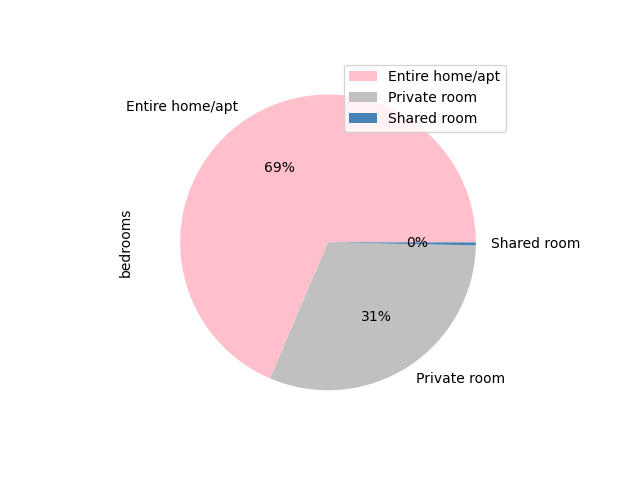

In [27]:
# Defining colors for the pie chart
colors = ['pink', 'silver', 'steelblue']
  
# Plotting the pie chart for above dataframe

Rooms = idf[(idf.city == select_city)].groupby(['room_type']).sum().plot(
    kind='pie',y ='bedrooms',  
  autopct='%1.0f%%', colors=colors)
Rooms


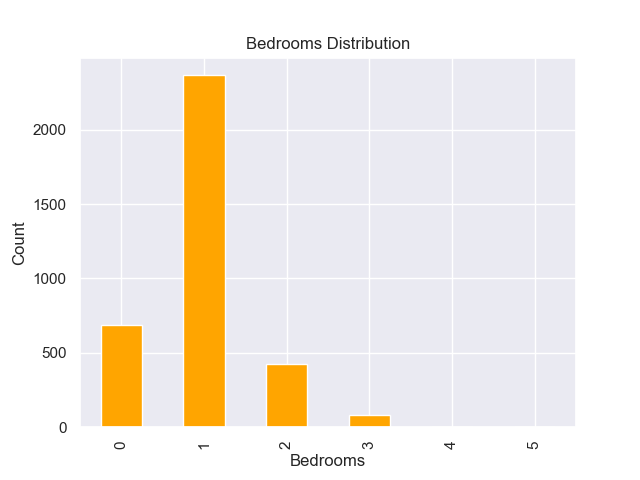

In [71]:
bedrooms_bar = idf[(idf.city == select_city)].groupby(['bedrooms']).size().plot(
    kind='bar',  color='ORANGE', xlabel='Bedrooms', ylabel='Count', title='Bedrooms Distribution')
bedrooms_bar

### Template Show will generate a dashboard in the link "http://localhost:54895"

In [67]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Europe airbnb', 
    sidebar=[pn.pane.Markdown("# Europe vacation rentals",style={'font-family': "serif"}), 
             pn.pane.Markdown("### Book unique homes, vacation rentals, and more on Airbnb."), 
             #pn.pane.PNG('file://./airbnb.jpg', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),rate_silder,select_city,select_bedroom,select_room_type
             ],
    main=[pn.Row(pn.Column (RentalTable.panel(width=1200))),
                 #RentalTable.panel(width=500))), 
          pn.Row(pn.Column(Rooms.panel(width=600), margin=(0,25)), 
            pn.Column(bedrooms_bar.panel(width=600), margin=(0,25)))], 
    
                # pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#A01346",
    header_background="#88d8b0",
)
template.show()
#template.servable();

Launching server at http://localhost:53287


#### Avg listing price in Europe cities

In [29]:
df_averageprice=airbnb_df.groupby('city')[['realSum']].mean()
df_averageprice


,realSum
city,
amsterdam,573.112795
athens,151.744121
barcelona,293.753706
berlin,244.583752
budapest,176.513548
lisbon,238.210479
london,362.469256
paris,392.531403
rome,205.391950


In [43]:
df_averageprice=airbnb_df.groupby(['city','realSum']).mean()
df_averageprice

room_shared  room_private  person_capacity  \
city      realSum                                                    
amsterdam 128.887118            0.0           0.0              2.0   
          143.650552            0.0           1.0              2.0   
          144.822253            0.0           1.0              3.0   
          161.929089            0.0           1.0              2.0   
          165.678532            0.0           1.0              2.0   
...                             ...           ...              ...   
vienna    881.191127            0.0           0.0              5.0   
          892.410537            0.0           0.0              6.0   
          12942.991375          0.0           0.0              4.0   
          13656.358830          0.0           1.0              2.0   
          13664.305916          0.0           1.0              2.0   

                        host_is_superhost  multi  biz  cleanliness_rating  \
city      realSum                                                           
amsterdam 128.887118                  0.0    1.0  0.0                10.0   
          143.650552                  0.0    0.0  0.0                 8.0   
          144.822253                  0.0    0.0  1.0                 9.0   
          161.929089                  0.0    0.0  0.0                 9.0   
          165.678532                  1.0    0.0  0.0                10.0   
...                                   ...    ...  ...                 ...   
vienna    881.191127                  0.0    0.0  0.0                10.0   
          892.410537                  0.0    0.0  1.0                 9.0   
          12942.991375                0.0    0.0  1.0                 7.0   
          13656.358830                0.0    0.0  0.0                 9.0   
          13664.305916                0.0    0.0  0.0                 9.0   

                        guest_satisfaction_overall  bedrooms      dist  \
city      realSum                                                        
amsterdam 128.887118                         100.0       1.0  3.914410   
          143.650552                          81.0       1.0  6.502260   
          144.822253                          82.5       1.0  7.579706   
          161.929089                          84.0       1.0  7.145769   
          165.678532                          98.0       1.0  8.787176   
...                                            ...       ...       ...   
vienna    881.191127                         100.0       2.0  2.770216   
          892.410537                          90.0       3.0  2.385427   
          12942.991375                        93.0       1.0  1.497979   
          13656.358830                        87.0       1.0  2.239486   
          13664.305916                        87.0       1.0  2.239501   

                        metro_dist  attr_index  attr_index_norm  rest_index  \
city      realSum                                                             
amsterdam 128.887118      1.065792  139.266967         7.374278  181.217870   
          143.650552      0.186805   72.665539         3.847689   91.111036   
          144.822253      3.288151   61.176108         3.239316   75.659426   
          161.929089      2.759656   65.630258         3.475166   81.219401   
          165.678532      0.760112   52.680688         2.789477   66.066658   
...                            ...         ...              ...         ...   
vienna    881.191127      0.305356   87.097295         6.237536  122.202124   
          892.410537      0.167182  109.125612         7.814856  167.288247   
          12942.991375    0.396893  123.776241         8.864325  196.019793   
          13656.358830    0.414409  128.349821         9.191567  201.546533   
          13664.305916    0.414395  128.349070         9.191812  201.545043   

                        rest_index_norm       lng        lat  
city      realSum                                        

In [45]:
airbnb_df.groupby(['city']).mean()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
city,,,,,,,,,,,,,,,,,,
amsterdam,573.112795,0.004808,0.453846,2.781731,0.284135,0.283173,0.105288,9.465865,94.514423,1.292308,2.825052,1.089367,269.064730,14.246499,335.712818,26.097566,4.890472,52.364637
athens,151.744121,0.002083,0.075189,3.698106,0.428598,0.267424,0.379924,9.638447,95.003598,1.271402,1.803080,0.478656,152.312177,5.740839,218.807826,9.954268,23.732031,37.980922
barcelona,293.753706,0.004236,0.804448,2.616661,0.181433,0.385104,0.325450,9.291564,91.109072,1.161313,2.116982,0.441248,460.767010,16.636220,881.070446,19.376528,2.169379,41.393495
berlin,244.583752,0.029388,0.615539,2.774960,0.257246,0.276167,0.174718,9.461755,94.323671,1.070451,5.257093,0.836064,110.223416,16.803111,146.875822,30.666967,13.399729,52.509110
budapest,176.513548,0.003481,0.104177,3.540776,0.378916,0.303332,0.348831,9.477374,94.585281,1.105669,1.872763,0.544059,212.463383,12.675248,423.982306,34.529089,19.061120,47.499287
lisbon,238.210479,0.012841,0.314246,3.343398,0.213951,0.239459,0.587541,9.370640,91.093875,1.272428,1.966893,0.711482,221.970147,7.324730,560.224296,28.274084,-9.143792,38.721298
london,362.469256,0.005004,0.556289,2.846192,0.157410,0.274992,0.387872,9.175023,90.645652,1.128790,5.326421,1.005547,295.448532,20.537398,627.541611,11.234105,-0.114830,51.503367
paris,392.531403,0.014055,0.228319,2.953648,0.140700,0.219498,0.245813,9.263606,92.037530,0.972787,2.995823,0.227323,374.186582,18.204358,818.768769,42.589111,2.343033,48.864343
rome,205.391950,0.001329,0.382630,3.357372,0.326687,0.385953,0.334109,9.514678,93.122300,1.229755,3.026982,0.819794,470.578123,10.426968,1151.413675,25.078056,12.486139,41.895372


In [30]:
airbnb_df.realSum.max()

18545.450284723363

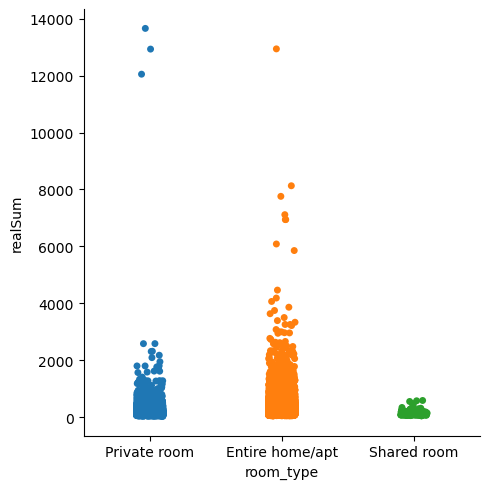

In [31]:
b =sns.catplot(x="room_type", y="realSum", data=weekends_df)
b


In [32]:
ratings_df = weekends_df[weekends_df.city.isin(['amsterdam' ,'athens', 'barcelona' ,'berlin' ,'budapest' ,'lisbon', 'london',
 'paris', 'rome', 'vienna'])]
ratings_df.hvplot.hist('guest_satisfaction_overall', by='city', bins=20, bin_range=(-20, 100), height=250,width=250,color= 'ORANGE', subplots=True)




:NdLayout   [city]
   :Histogram   [guest_satisfaction_overall]   (guest_satisfaction_overall_count)

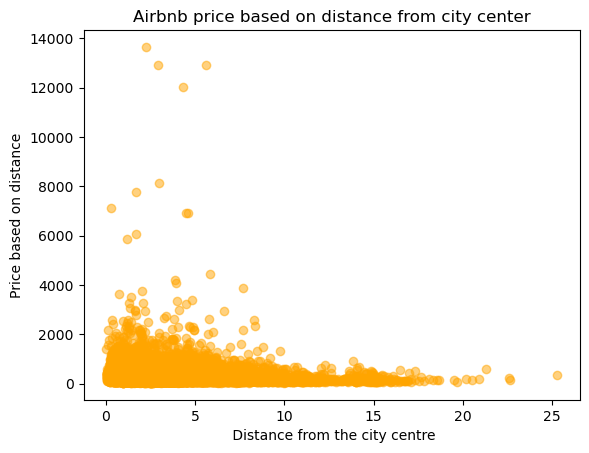

In [33]:
plt.scatter(weekends_df['dist'],weekends_df['realSum'],alpha=0.5 ,color ='orange')
#Adding the aesthetics
plt.title('Airbnb price based on distance from city center')
plt.xlabel(' Distance from the city centre')
plt.ylabel('Price based on distance') 
#Show the plot
plt.show()


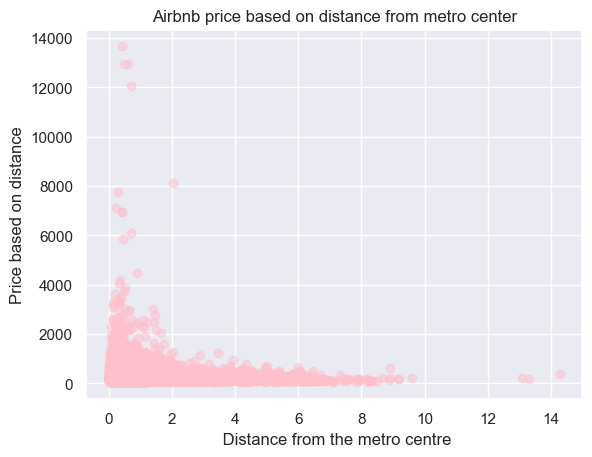

In [73]:
plt.scatter(weekends_df['metro_dist'],weekends_df['realSum'],alpha=0.5 ,color ='PINK')
#Adding the aesthetics
plt.title('Airbnb price based on distance from metro center')
plt.xlabel(' Distance from the metro centre')
plt.ylabel('Price based on distance') 
#Show the plot
plt.show()


In [35]:
weekends_df.groupby(['city','bedrooms']).size()


city       bedrooms
amsterdam  0             63
           1            636
           2            210
           3             57
           4              9
           5              2
athens     0            213
           1           1586
           2            750
           3             77
           4              1
barcelona  0             35
           1           1113
           2            109
           3             19
           4              1
           6              1
berlin     0             86
           1            990
           2            102
           3             20
           4              1
           9              1
budapest   0            297
           1           1222
           2            390
           3             39
lisbon     0            177
           1           1961
           2            640
           3            116
           4              7
           9              4
           10             1
london     0            386


In [36]:
Unique_city = airbnb_df.groupby('city')['realSum'].mean().sort_values()[::-1].index
Unique_city

Index(['amsterdam', 'paris', 'london', 'barcelona', 'berlin', 'vienna',
       'lisbon', 'rome', 'budapest', 'athens'],
      dtype='object', name='city')

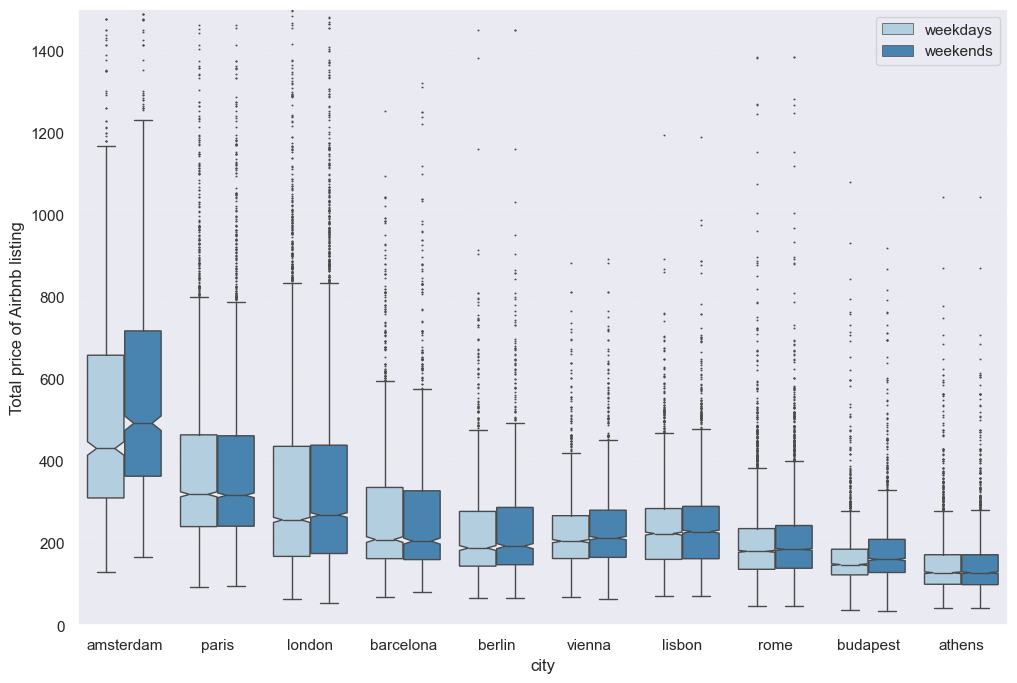

<Figure size 640x480 with 0 Axes>

In [78]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.axis([0,10,0,1500])
my_pal = {"amestrdam": "g", "setosa": "b", "virginica":"m"}
#sns.set(style="darkgrid")
#sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="city", y="realSum", hue="type", palette= 'Blues', 
            data=airbnb_df, fliersize=0.5, linewidth=1, order=Unique_city,notch=True)
plt.ylabel('Total price of Airbnb listing')
ax.set_xticklabels(Unique_city)
plt.grid(axis='y', color='#E8E8E8', linestyle='--', linewidth=.5)
plt.legend(loc=1)
plt.show()
plt.clf()